In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
art = gpd.read_file('../data/Metro_Art_in_Public_Places_view_7654276037388908582.geojson')
print(art.crs)
print(art.info())

EPSG:4326
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Title             164 non-null    object  
 1   ArtistLastName    164 non-null    object  
 2   ArtistFirstName   159 non-null    object  
 3   Address           164 non-null    object  
 4   Medium            162 non-null    object  
 5   InstallationType  164 non-null    object  
 6   Description       107 non-null    object  
 7   Latitude          162 non-null    float64 
 8   Longitude         162 non-null    float64 
 9   City              164 non-null    object  
 10  State             164 non-null    object  
 11  ZipCode           162 non-null    object  
 12  GlobalID          164 non-null    object  
 13  OBJECTID          164 non-null    int32   
 14  geometry          162 non-null    geometry
dtypes: float64(2), geometry(1), int32(1), object(11)
memory 

In [3]:
art = art.dropna(subset = ['Latitude', 'Longitude'])

In [4]:
mural_art = art[art['InstallationType'] == "Mural"]

In [5]:
mural_art.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 54 entries, 0 to 160
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Title             54 non-null     object  
 1   ArtistLastName    54 non-null     object  
 2   ArtistFirstName   52 non-null     object  
 3   Address           54 non-null     object  
 4   Medium            54 non-null     object  
 5   InstallationType  54 non-null     object  
 6   Description       30 non-null     object  
 7   Latitude          54 non-null     float64 
 8   Longitude         54 non-null     float64 
 9   City              54 non-null     object  
 10  State             54 non-null     object  
 11  ZipCode           54 non-null     object  
 12  GlobalID          54 non-null     object  
 13  OBJECTID          54 non-null     int32   
 14  geometry          54 non-null     geometry
dtypes: float64(2), geometry(1), int32(1), object(11)
memory usage: 6.5+ KB


In [6]:
zip_list = mural_art['ZipCode'].unique().tolist()
print(zip_list)

['37201', '37219', '37221', '37212', '37206', '37203', '37210', '37209', '37115', '37240', '37205', '37204', '37208']


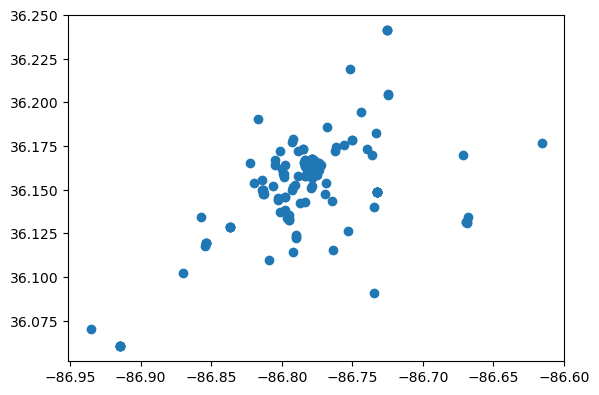

In [7]:
art.plot();

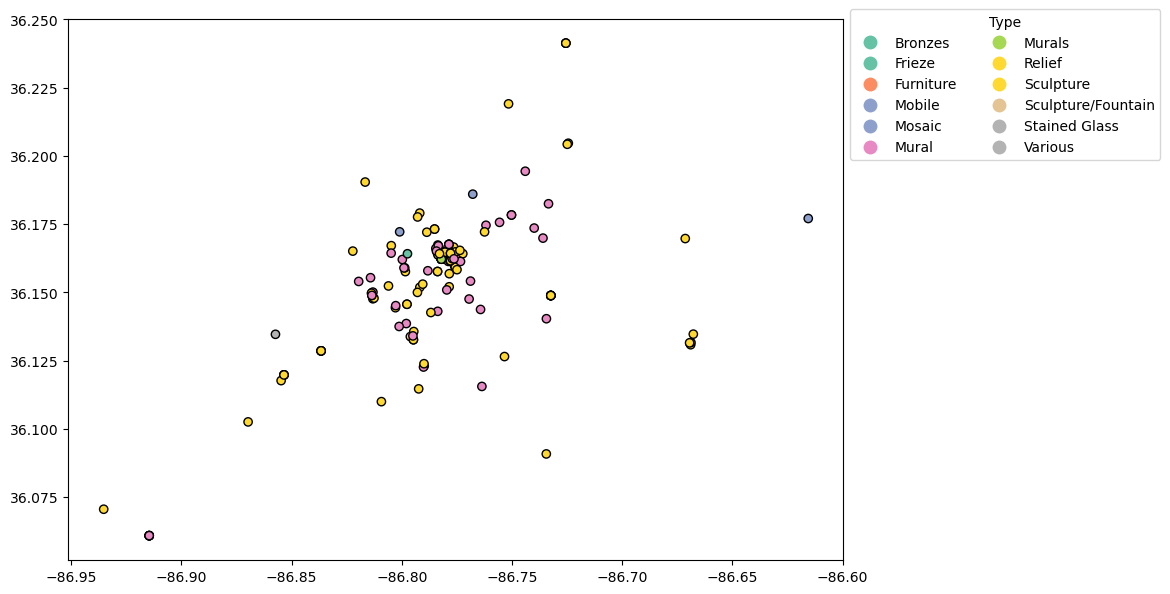

In [8]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Type', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

art.plot(column = 'InstallationType', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [9]:
map_center = [36.1631, -86.7801]
nashville_map = folium.Map(location=map_center, zoom_start=12)
nashville_map

In [10]:
i = 0
for row_index, row_values in art.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
Title                                    Les Paul Guitar Mural
ArtistLastName                                          Hughes
ArtistFirstName                                         Milree
Address                                           100 Broadway
Medium                                                Painting
InstallationType                                         Mural
Description                                               None
Latitude                                               36.1624
Longitude                                            -86.77491
City                                                 Nashville
State                                                       TN
ZipCode                                                  37201
GlobalID                  35e62647-30e1-48e6-8ff8-4a295f9fd7cd
OBJECTID                                                     1
geometry            POINT (-86.7749099997113 36.1623999997369)
Name: 0, dtype: object
-------

In [11]:
nashville_map = folium.Map(location=map_center, zoom_start=16)

folium.GeoJson(art).add_to(nashville_map)

installation_type = {'Bronzes':'red', 'Frieze':'orange', 'Furniture':'blue', 'Mobile':'lightblue', 'Mosaic':'darkpurple', 'Mural':'purple', 'Murals':'purple', 'Relief':'lightgreen', 'Sculpture':'lightgray', 'Sculpture/Fountain':'lightgray', 'Stained Glass':'pink', 'Various':'green'}

for row_index, row_values in art.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Title']) + ',' + '<br>' + str(row_values['InstallationType'])
    icon = folium.Icon(color=installation_type[row_values['InstallationType']], icon="paint-brush", prefix='fa')
    marker = folium.Marker(location = loc, popup = pop, icon = icon) 
    marker.add_to(nashville_map)
    
nashville_map.save('../maps/nashville_map.html')

nashville_map